<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>نتفلیکس</b>
</font>
</h2>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین نمودار‌هایی را با توجه داده‌های شرکت نتفلیکس رسم می‌کنیم و با توجه به آنها تحلیل‌هایی ارائه می‌کنیم.
<br>
کتابخانه‌هایی که برای مصورسازی استفاده می‌کنیم مت‌پلات‌لیب، پلاتلی و سیبورن خواهند بود.
</font>
</p>


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
plt.rcParams['figure.dpi'] = 140


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش اول کمی تمیزکاری در داده‌ها خواهیم داشت.
<br>
در ستون‌های cast , director به جای مقادیر خالی عبارت "No Data" قرار دهید و در بقیه ردیف‌هایی که مقادیر خالی دارند را حذف کنید.
<br>
در انتها نباید هیچ مقدار خالی و گم‌شده‌ای وجود داشته باشد.
</font>
</p>


In [73]:
df = pd.read_csv('netflix_titles.csv')
df['director'].fillna('No Data', inplace=True)
df['cast'].fillna('No Data', inplace=True)
df.dropna(inplace=True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش بعدی با توجه به ستون date_added ستون‌های:
    <br>
    month_added (ماهی که فیلم اضافه شده)<br>
    month_name_added (نام ماهی که فیلم اضافه شده مثلا ژانویه)<br>
    year_added (سالی که فیلم اضافه شده) را اضافه کنید  
</font>
</p>


In [74]:
df.date_added = df.date_added.apply(lambda x: x.strip())
df.date_added = pd.to_datetime(df['date_added'], format="%B %d, %Y")
month_added = []
month_name_added = []
year_added = []
for time in df.date_added:
    month_added.append(time.strftime('%m'))
    month_name_added.append(time.strftime('%B'))
    year_added.append(time.strftime('%Y'))
df = df.assign(month_added=month_added,month_name_added=month_name_added,year_added=year_added)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار اول (نسبت فیلم‌ها و سریال‌ها)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار با استفاده از متد <b>barh</b> نشان دهید که چند درصد محتواها فیلم و چند درصد سریال هستند.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (6.5, 2.5)
</li>    
<li>
رنگ بخش فیلم‌ها: #b20710 
</li>     
    
<li>
رنگ بخش سریال‌ها:
    #221f1f 
</li>   

<li>    
alplha: 0.9    
</li>    
   
  
<li> محور‌های دور نمودار را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
<li>
    fontfamily = serif
</li>   
    
<li> 
این دستور را در انتهای این بخش وارد کنید تا سیستم داوری به درستی کد شما را نمره‌دهی کند   
<br>
ax_ratio.legend().set_visible(False)    
</li>    
    
</ul>    


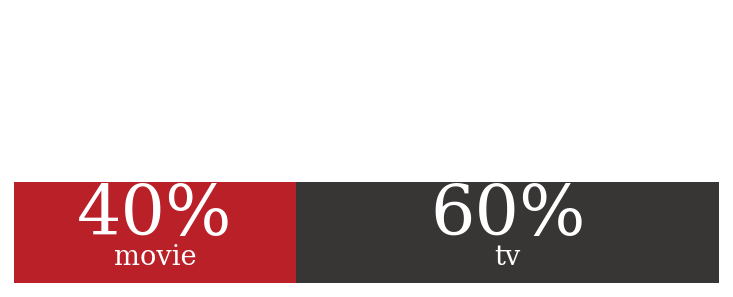

In [75]:
fig_ratio, ax_ratio = plt.subplots(figsize=(6.5, 2.5))
m = 40
t = 60
plt.barh(0,t,left=m, label='tv', color='#221f1f',alpha=0.9,height=1.5)
plt.barh(0,m,label='movie', color='#b20710', alpha=0.9,height=1.5)
plt.xlim([0,100])
plt.ylim([0,2])
plt.text(m/2,.14,'movie',ha='center',c='white',family='serif', size=14)
plt.text(t/2+m,.14,'tv',ha='center',c='white',family='serif', size=14)
plt.text(m/2,.36,'40%',ha='center',c='white',family='serif', size=36)
plt.text(t/2+m,.36,'60%',ha='center',c='white',family='serif', size=36)
ax_ratio.grid(False)
plt.axis('off')
sns.despine(left=True, bottom=True)
ax_ratio.legend()
ax_ratio.get_legend().set_visible(False)
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار دوم (ده کشور برتر)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار با استفاده از یک نمودار میله‌ای، ده کشوری که بیشترین محتوا در نتفلیکس دارند را نشان دهید.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (12, 6)
</li>    
    
<li>
رنگ میله سه کشور اول:
    #b20710
</li>     
    
<li>
رنگ میله باقی کشورها: 
    #f5f5f1 
</li>   

   
  
<li> محور‌های بالا، چپ و راست را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
    

<li>    
نام United States را به US و United Kingdom را به UK و South Korea را به S. Korea تغییر دهید. 
</li> 
    
<li>
fontfamily = serif
</li>   
    
<li>
    alignment متن‌ها را center قرار دهید 
</li>    

<li>
labelsize=12
<br>
length = 0 ( در tick_params )    
</li>    
    
<li>
محور افقی با گام ۵۰۰
</li>    
</ul>    


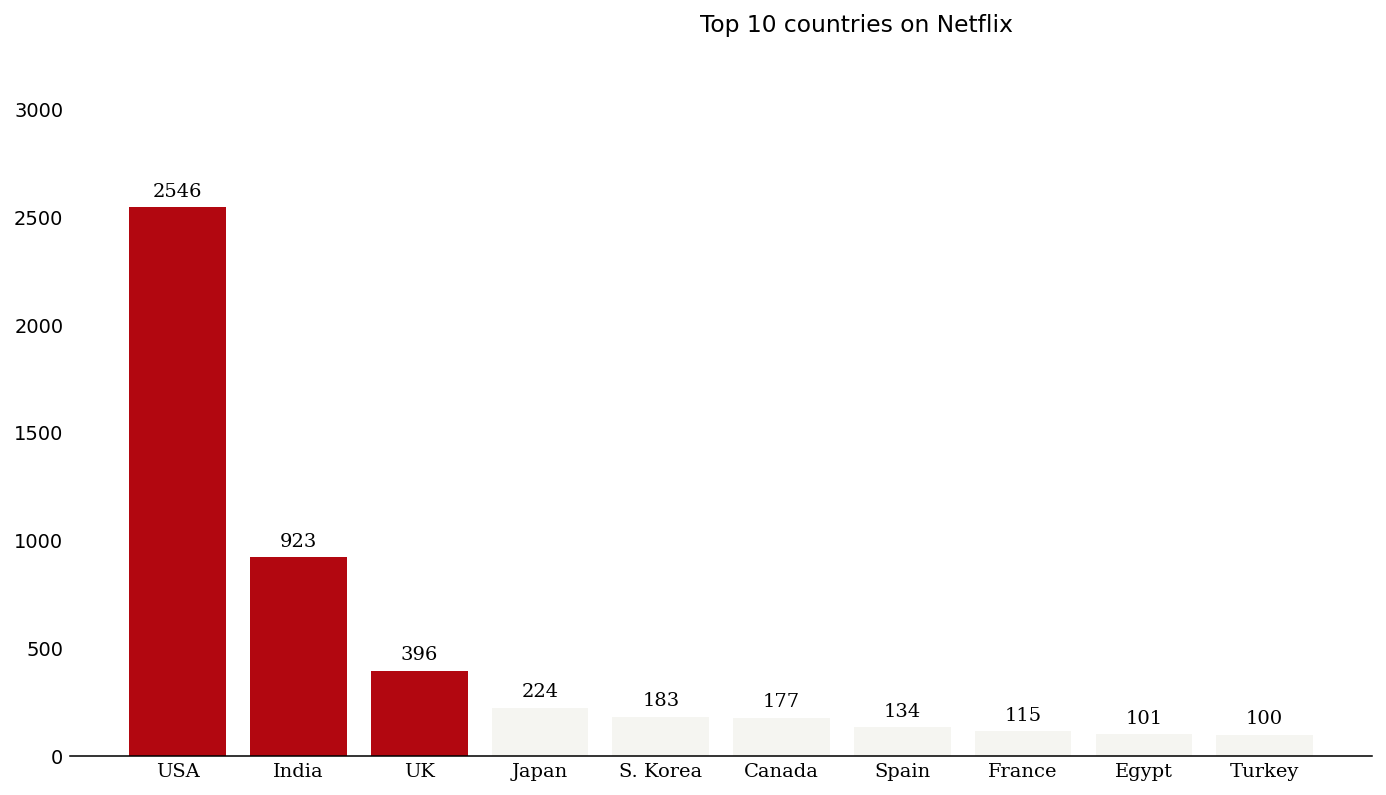

In [76]:
top10 = df.country
for i, c in enumerate(top10):
    if len(c.split(',')) > 1:
        top10[i] = c.split(',')[0]
        
top10 = df.country.value_counts()[:10]
top10 = top10.to_frame()
top10 = top10.assign(country=top10.index)
for i, c in enumerate(top10.country):
    if c == 'United States':
        top10.country[c] = 'USA'
    elif c == 'United Kingdom':
        top10.country[c] = 'UK'
    elif c == 'South Korea':
        top10.country[c] = 'S. Korea'   
top10

fig_top10, ax_top10 = plt.subplots(figsize=(12, 6))
first_three_color = '#B20710'
rest_color = '#f5f5f1'
color_ls = [first_three_color for i in range(3)]
color_ls += [rest_color for i in range(7)]

ax_top10.bar(top10.country,height=top10['count'], align='center', color=color_ls)
ax_top10.spines[['right', 'top','left']].set_visible(False)
ax_top10.grid(False)
plt.suptitle('Top 10 countries on Netflix', ha='left', va='center')
plt.xticks(family='serif')
plt.yticks(range(0, 3500, 500))
ax_top10.tick_params(length=0)

for i, n in enumerate(top10['count']):
    ax_top10.text(i, n + 50, str(n), family='serif', ha='center')

    
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار سوم (تعداد محتوای منتشر شده در هر سال)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار تعداد محتوای منتشر شده در هر سال از سال ۲۰۰۸ تا ۲۰۲۰ را به تفکیک فیلم و سریال نشان دهید.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (12, 6)
</li>    
    
<li>
رنگ بخش فیلم‌ها:
    #b20710
</li>     
    
<li>
رنگ بخش سریال‌ها:
    #221f1f 
</li>   

<li>    
alplha: 0.9    
</li>    
   
  
<li> محور‌های دور نمودار را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
    

<li>    
داده 
</li> 
    
<li>
fontfamily = serif
</li>   
    
<li>
alignment متن‌ها را center قرار دهید 
</li>    

<li>
labelsize=12
<br>
length = 0 ( در tick_params )    
</li>    
    
<li>
xlim(2008,2020)   
</li>    
    
<li>
لیبل‌های محور y را در سمت راست قرار دهید
</li>    
    
<li>
grid = False    
</li>    
    
<li>
یک خط با این مشخصات روی محور افقی بکشید:
<br>
رنگ: black
<br>
عرض خط: 13   
<br>
مقدار alpha: 0.7     
</li>    
    
<li>
مشخصات متن Movie|TV Show:
<br>
fontweight="bold", fontfamily='serif', fontsize=15    
<br>
رنگ متن Movie:
#b20710
<br>
رنگ جدا کننده (|):
black
<br>
رنگ متن Tv Show:
#221f1f    
</li>    
</ul>    


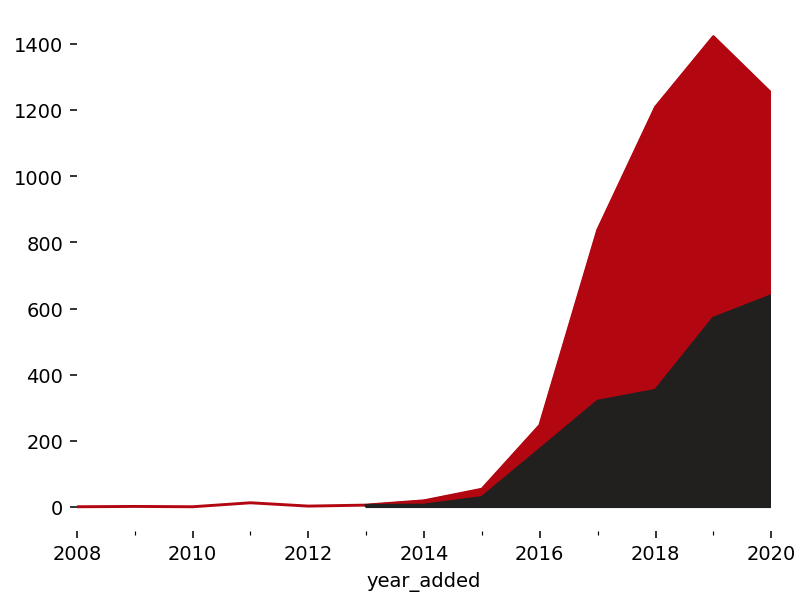

In [94]:
df['year_added'] = pd.to_datetime(df['year_added'])
# df['year_added'] = df['year_added'].drop[-1]
grouped_data = df.groupby([pd.Grouper(key='year_added', freq='Y'), 'type']).size().reset_index(name='count')
mask = (grouped_data['year_added'] >= '2008-01-01') & (grouped_data['year_added'] <= '2020-12-31')
sliced_data = grouped_data.loc[mask]
pivoted_data = sliced_data.pivot(index='year_added', columns='type', values='count')
ax_mediaOverTime = pivoted_data.plot(color=['#b20710','#221f1f'])
ax_mediaOverTime.spines[['right', 'top','left','bottom']].set_visible(False)
ax_mediaOverTime.grid(False)
ax_mediaOverTime.fill_between(pivoted_data.index, pivoted_data['Movie'], pivoted_data['TV Show'], color='#b20710')
ax_mediaOverTime.fill_between(pivoted_data.index, pivoted_data['TV Show'], 0, color='#221f1f')
ax_mediaOverTime.get_legend().set_visible(False)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


In [95]:
import zlib
import zipfile
import joblib

joblib.dump(fig_ratio,"fig_ratio")
joblib.dump(fig_top10,"fig_top10")
joblib.dump(fig_mediaOverTime,"fig_mediaOverTime")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["fig_ratio","fig_top10","fig_mediaOverTime", "netflix.ipynb"]
compress(file_names)

File Paths:
['fig_ratio', 'fig_top10', 'fig_mediaOverTime', 'netflix.ipynb']
